# Directory, Libraries, and data

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


# Libraries

In [ ]:
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

# Load Data

In [ ]:
df=pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution

<Axes: ylabel='Density'>

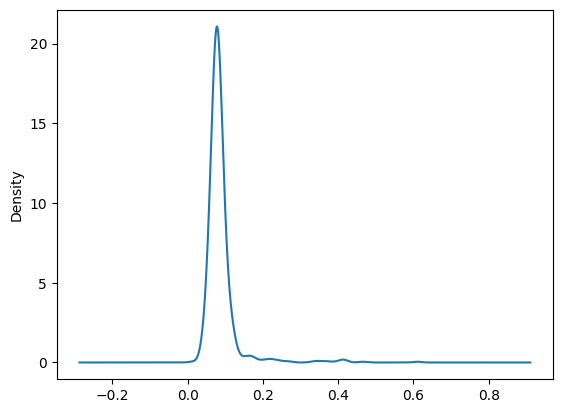

In [ ]:
#Desnsity plot of chlorides
df.chlorides.plot.density()

In [ ]:
#Check the # of observations within X standard deviations
print(df.loc[(df.chlorides<=df.chlorides.mean()+1*df.chlorides.std())&
        (df.chlorides>=df.chlorides.mean()-1*df.chlorides.std())].chlorides.count()/df.chlorides.count())
print(df.loc[(df.chlorides<=df.chlorides.mean()+2*df.chlorides.std())&
        (df.chlorides>=df.chlorides.mean()-2*df.chlorides.std())].chlorides.count()/df.chlorides.count())
df.loc[(df.chlorides<=df.chlorides.mean()+3*df.chlorides.std())&
        (df.chlorides>=df.chlorides.mean()-3*df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9480925578486554
0.9718574108818011


0.9806128830519074

<Axes: ylabel='Density'>

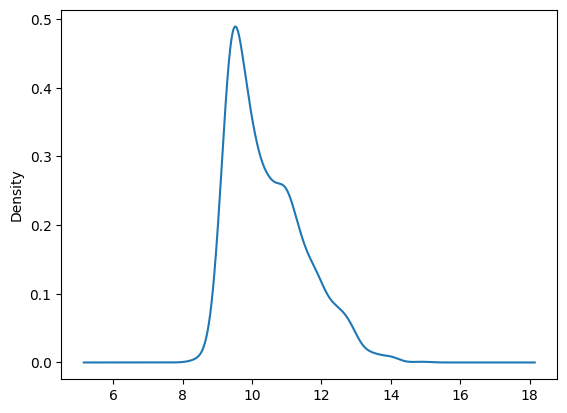

In [ ]:
#Plot alcohol density distribution
df.alcohol.plot.density()

In [ ]:
#Find what is the share of observations within 3 standard deviations of alcohol
df.loc[(df.alcohol<=df.alcohol.mean()+3*df.alcohol.std())&
       (df.alcohol>=df.alcohol.mean()-3*df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

# Shapiro-Wilks Test

In [ ]:
#Shapiro-Wilks Test for Normality
stat, p=st.shapiro(df.chlorides)
print(p)
#condition
if p>0.05:
  #if yes
  print('Sample looks Gaussian/Normal (Fail to reject H0)')
  #if not
else:
    print('Sample does not look Gaussian/Normal (Reject H0)')

0.0
Sample does not look Gaussian/Normal (Reject H0)


In [ ]:
#Shapiro Wilks Test for Sulphates and create if else condition
stat, pv=st.shapiro(df.sulphates)
print (pv)
#Condition
if pv>0.05:
  #if yes
  print('Sample looks Gaussian/Normal (Fail to reject H0)')
  #if not
else:
  print('Sample does not look Gaussian/Normal (Reject H0)')

5.821617678881608e-38
Sample does not look Gaussian/Normal (Reject H0)


# Standard Error

In [ ]:
#Standard Error Using a Function
st.sem(df.alcohol)

0.026650018979018173

In [ ]:
#Standard error using the Computations: Standard deviations divided by the square root of observations
df.alcohol.std()/m.sqrt(df.alcohol.count())

0.026650018979018173

In [ ]:
#Standard Error of PH using function and computation
#Using Function
print('Using Function:')
print(st.sem(df.pH))

#Using computation
print('Using Computation:')
df.pH.std()/m.sqrt(df.pH.count())

Using Function:
0.0038608683325203784
Using Computation:


0.0038608683325203784

# Confidence Interval

In [ ]:
#Confidence interval of the mean citric acid
print(df[['citric acid']].mean())
st.norm.interval(confidence=0.95,
                 loc=df[['citric acid']].mean(),
                 scale=st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

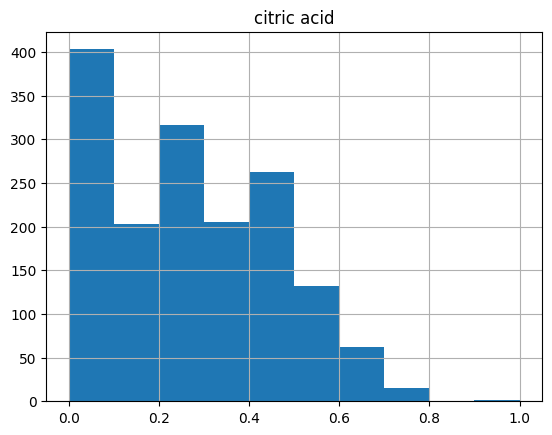

In [ ]:
#Histogram
df[['citric acid']].hist()

In [ ]:
#Confidence Interval of the Density Mean
print(df.density.mean())
st.norm.interval(confidence=0.95,
                 loc=df.density.mean(),
                 scale=st.sem(df.density))

0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

<Axes: >

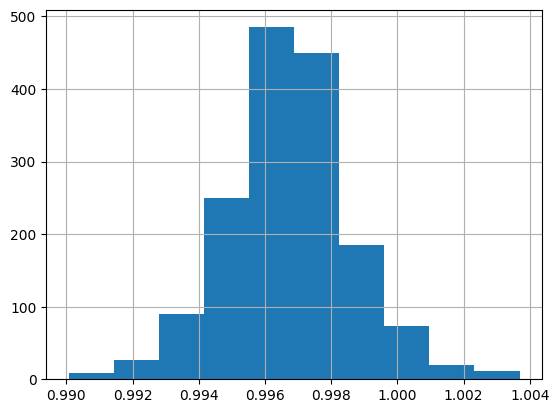

In [ ]:
#Histogram of Density mean
df.density.hist()

#T-Test

#Load Data


In [ ]:
#Load Data
data=pd.read_csv('stackoverflow.csv')
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Subset
salary_uk=data.loc[data.Country=='United Kingdom'].Salary
salary_de=data.loc[data.Country=='Germany'].Salary

In [ ]:
#T-test
stat, p=st.ttest_ind(a=salary_uk, b=salary_de)
print(p)
if p>0.05:
  print('Both countries have similar salaries (fail to reject H0)')
else:
  print('There is a difference in salaries (Reject H0)')

0.026389999555203502
There is a difference in salaries (Reject H0)


In [ ]:
#T-test in experience between India and United States
#Subset
exp_india=data.loc[data.Country=='India'].YearsCodedJob
exp_us=data.loc[data.Country=='United States'].YearsCodedJob

#T-test
stat, p=st.ttest_ind(a=exp_india, b=exp_us)
print(p)
if p>0.05:
  print('Both countries have similar experience (fail to reject H0)')
else:
  print('There is a difference in experiences (Reject H0)')


5.225676347614714e-58
There is a difference in experiences (Reject H0)


<Axes: >

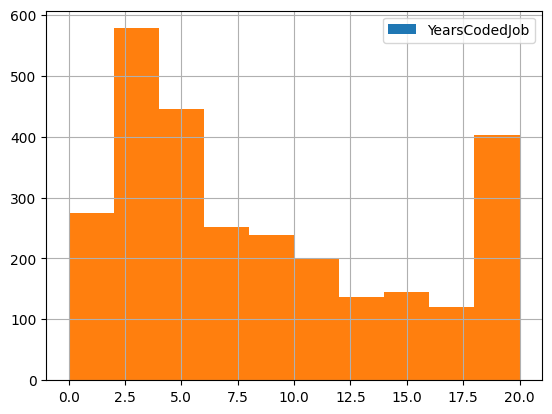

In [ ]:
#Histograms
exp_india.hist(legend = True)
exp_us.hist()

#Chi-Square test

In [ ]:
#Cross tabulation
tab=pd.crosstab(index=data.Country,
                columns=data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [ ]:
#Chi-Square test
chi2,p,dof,exp=st.chi2_contingency(tab)
print(chi2)
print(p)
print(dof)
if p>0.05:
  print("There is no relationship (fail to reject HO)")
else:
  print("There is a strong relationship (reject HO)")

78.67672415412689
3.321120877301216e-16
4
There is a strong relationship (reject HO)


In [ ]:
#Chi-Square test between company size and hobbies
tab2=pd.crosstab(index=data.CompanySizeNumber,
                 columns=data.Hobby)
print(tab2)

chi2,p,dof,exp=st.chi2_contingency(tab2)
print(chi2)
print(p)
print(dof)
if p>0.05:
  print("There is no relationship (fail to reject HO)")
else:
  print("There is a strong relationship (reject HO)")

Hobby                0    1
CompanySizeNumber          
1                  101  311
10                 123  400
20                 293  961
100                245  918
500                 91  309
1000               180  436
5000                60  192
10000              243  731
15.935902955290901
0.025708455559671047
7
There is a strong relationship (reject HO)
